---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [2]:
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National',
          'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana',
          'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho',
          'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin',
          'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam',
          'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas',
          'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri',
          'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas',
          'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado',
          'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota',
          'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota',
          'VA': 'Virginia'}

In [3]:
len(states)

57

In [4]:
def get_list_of_university_towns():
    
    data = []
    state = None
    state_towns = []
    with open('university_towns.txt') as file:
        for line in file:
            thisLine = line[:-1]
            if thisLine[-6:] == '[edit]':
                state = thisLine[:-6]
                continue
            if '(' in line:
                town = thisLine[:thisLine.index('(')-1]
                state_towns.append([state,town])
            else:
                town = thisLine
                state_towns.append([state,town])
            data.append(thisLine)
    df = pd.DataFrame(state_towns,columns = ['State','RegionName'])
    return df
 

In [5]:
def get_recession_start():
    
    gf=pd.read_excel("gdplev.xls")
    gf=gf[219:]
    gf.reset_index(inplace=True)
    gf.drop('index',axis=1,inplace=True)
    c=0
    i=0
    while c<2:
        
        x = gf.loc[i+1]['Unnamed: 6']-gf.loc[i]['Unnamed: 6']
        if x<0:
            c=c+1
        else:
            c=0
        
        if i<66:
            i=i+1
        else:
            break
     
    ans=gf.loc[i-1]['Unnamed: 4']
    rsi=i-1       
    return(ans)

get_recession_start()

'2008q3'

In [6]:
def get_recession_end():

    gf=pd.read_excel("gdplev.xls")
    gf=gf[219+34:]
    gf.reset_index(inplace=True)
    gf.drop('index',axis=1,inplace=True)
    c=0
    i=0
    while c<2:
        
        x = gf.loc[i+1]['Unnamed: 6']-gf.loc[i]['Unnamed: 6']
        if x>0:
            c=c+1
        else:
            c=0
        
        if i<len(gf):
            i=i+1
        else:
            break
            
    ans=gf.loc[i]['Unnamed: 4']
    rei=i
    return(ans)
               
get_recession_end()

'2009q4'

In [7]:
def get_recession_bottom():
    
    gf=pd.read_excel("gdplev.xls")
    gf=gf[219+34:219+39]
    gf.reset_index(inplace=True)
    gf.drop('index',axis=1,inplace=True)
    arr=[]
    for i in range(5):
        x=gf.loc[i]['Unnamed: 6']
        arr.append(x)
    v=arr.index(min(arr))
    ans=gf.loc[v]['Unnamed: 4']
        
    return(ans)
get_recession_bottom()

'2009q2'

In [8]:
df1=get_list_of_university_towns()
df2=pd.read_excel("gdplev.xls")
df3=pd.read_csv("City_Zhvi_AllHomes.csv")

In [9]:
x=4
y=5
z=6
year=1996
q=2
arr1=[]
for i in range(81):
    
    if z>12:
        x=1
        y=2
        z=3

    else:
        flag=0

    if q>4:
        q=1
        year=year+1
    else:
        flag=0
    
    a=str(year)+"-"+str(x).zfill(2)
    b=str(year)+"-"+str(y).zfill(2)
    c=str(year)+"-"+str(z).zfill(2)
    str1=str(year)+"q"+str(q)
    arr1.append(str1)
    df3[str1]=(df3[a]+df3[b]+df3[c])/3
    x=x+3
    y=y+3
    z=z+3
    q=q+1

df3['2016q3']=(df3["2016-07"]+df3["2016-08"])/2

In [10]:
df3.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,587200.0
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0


In [11]:
arr1=arr1[15:]

In [12]:
arr1.insert(0,'RegionName')
arr1.insert(0,'State')


In [13]:
df4=df3[arr1]

In [14]:
arr2=[]
for i in range(57):
    arr2.append(i)

In [15]:
arr3=list(states.keys())
arr4=list(states.values())
xoxo={'avb':arr3,'names':arr4}

In [16]:
df5=pd.DataFrame(xoxo)

In [18]:
final = pd.merge(df4,df5,how='inner',left_on='State',right_on='avb')

In [19]:
final.drop('State',axis=1,inplace=True)
final.drop('avb',axis=1,inplace=True)

In [20]:
final=final.rename(columns={'names':'State'})
final.head()

,RegionName,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,State
0,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,515466.666667,522800.000000,528066.666667,532266.666667,540800.000000,557200.000000,572833.333333,582866.666667,591633.333333,New York
1,Rochester,53566.666667,53233.333333,53200.000000,53200.000000,53066.666667,52533.333333,52666.666667,53200.000000,53366.666667,...,60100.000000,61266.666667,62800.000000,62900.000000,63966.666667,64800.000000,65333.333333,66833.333333,67000.000000,New York
2,Yonkers,222233.333333,230900.000000,245533.333333,254400.000000,259266.666667,263700.000000,271300.000000,282066.666667,292833.333333,...,382033.333333,385766.666667,385333.333333,385866.666667,388800.000000,401233.333333,404433.333333,407066.666667,409800.000000,New York
3,Syracuse,56800.000000,57866.666667,57400.000000,57233.333333,57100.000000,56966.666667,57433.333333,58000.000000,59033.333333,...,76533.333333,75733.333333,75133.333333,76966.666667,78533.333333,79200.000000,80400.000000,80566.666667,78733.333333,New York
4,Town of Greece,95100.000000,95500.000000,96333.333333,96933.333333,98266.666667,99300.000000,100000.000000,101200.000000,102766.666667,...,120000.000000,121133.333333,122433.333333,121633.333333,122800.000000,123966.666667,124466.666667,125933.333333,126633.333333,New York


In [21]:
final1=final.set_index(['State','RegionName'])

In [22]:
final1.head()

2000q1         2000q2         2000q3  \
State    RegionName                                                    
New York New York                  NaN            NaN            NaN   
         Rochester        53566.666667   53233.333333   53200.000000   
         Yonkers         222233.333333  230900.000000  245533.333333   
         Syracuse         56800.000000   57866.666667   57400.000000   
         Town of Greece   95100.000000   95500.000000   96333.333333   

                                2000q4         2001q1         2001q2  \
State    RegionName                                                    
New York New York                  NaN            NaN            NaN   
         Rochester        53200.000000   53066.666667   52533.333333   
         Yonkers         254400.000000  259266.666667  263700.000000   
         Syracuse         57233.333333   57100.000000   56966.666667   
         Town of Greece   96933.333333   98266.666667   99300.000000   

                                2001q3         2001q4         2002q1  \
State    RegionName                                                    
New York New York                  NaN            NaN            NaN   
         Rochester        52666.666667   53200.000000   53366.666667   
         Yonkers         271300.000000  282066.666667  292833.333333   
         Syracuse         57433.333333   58000.000000   59033.333333   
         Town of Greece  100000.000000  101200.000000  102766.666667   

                                2002q2      ...               2014q1  \
State    RegionName                         ...                        
New York New York                  NaN      ...        503133.333333   
         Rochester        53566.666667      ...         59633.333333   
         Yonkers         303533.333333      ...        375333.333333   
         Syracuse         60200.000000      ...         76433.333333   
         Town of Greece  103400.000000      ...        120266.666667   

                                2014q2         2014q3         2014q4  \
State    RegionName                                                    
New York New York        515466.666667  522800.000000  528066.666667   
         Rochester        60100.000000   61266.666667   62800.000000   
         Yonkers         382033.333333  385766.666667  385333.333333   
         Syracuse         76533.333333   75733.333333   75133.333333   
         Town of Greece  120000.000000  121133.333333  122433.333333   

                                2015q1         2015q2         2015q3  \
State    RegionName                                                    
New York New York        532266.666667  540800.000000  557200.000000   
         Rochester        62900.000000   63966.666667   64800.000000   
         Yonkers         385866.666667  388800.000000  401233.333333   
         Syracuse         76966.666667   78533.333333   79200.000000   
         Town of Greece  121633.333333  122800.000000  123966.666667   

                                2015q4         2016q1         2016q2  
State    RegionName                                                   
New York New York        572833.333333  582866.666667  591633.333333  
         Rochester        65333.333333   66833.333333   67000.000000  
         Yonkers         404433.333333  407066.666667  409800.000000  
         Syracuse         80400.000000   80566.666667   78733.333333  
         Town of Greece  124466.666667  125933.333333  126633.333333  

[5 rows x 66 columns]

In [23]:
final2= final.transpose()

In [24]:
header=list(final2.iloc[0])

In [25]:
final2=final2[1:]

In [26]:
final2.columns=header

In [27]:
Us_reces= final2[34:40]

In [28]:
Us_reces

,New York,Rochester,Yonkers,Syracuse,Town of Greece,Albany,Town of Poughkeepsie,New Rochelle,Town of Colonie,Mount Vernon,...,Orwell,Town of Wallingford,Stamford,Mendon,Morrisville,Town of Marshfield,Graniteville-East Barre,Town of Manchester,East Montpelier,Town of Dixfield
2008q3,499767,58933.3,456367,76900,115467,170900,256500,653767,204100,482867,...,NaN,NaN,NaN,220200,NaN,171400,154300,NaN,268533,NaN
2008q4,487933,59100,445500,76900,114967,170967,251267,649900,205033,470733,...,NaN,NaN,NaN,213267,NaN,173233,151133,NaN,250300,NaN
2009q1,477733,58500,434900,75400,113300,171967,248033,636233,206433,443600,...,NaN,NaN,NaN,219467,NaN,180800,146467,NaN,260700,NaN
2009q2,465833,58200,429300,75033.3,113100,169900,243033,620933,204167,417600,...,209300,194600,NaN,206500,NaN,187067,139267,346533,269733,106033
2009q3,455933,58700,421533,75533.3,114033,169733,234800,606833,203267,405333,...,218733,191467,NaN,197400,NaN,191067,135633,347233,270333,96833.3
2009q4,458367,59800,418567,76433.3,115167,171500,231933,603733,205167,402167,...,219367,187400,NaN,199433,126600,196333,137367,335567,272500,92166.7


In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [30]:
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8
x=np.arange(6)
objects=list(Us_reces.index)
y1=Us_reces['New York']
y2=Us_reces['Yonkers']
y3=Us_reces['New Rochelle']
f1=plt.bar(x,y1,bar_width,alpha=opacity,color='cyan',label='New York')
f2=plt.bar(x + bar_width,y2,bar_width,alpha=opacity,color='blue',label='Yonkers')
f3=plt.bar(x + bar_width*2,y3,bar_width,alpha=opacity,color='red',label='New Rochelle')
plt.xlabel('Quaters')
plt.ylabel('Median Sales Price $')
plt.title('House prices in Great Recession (New York)')
plt.xticks(x,objects)
plt.tight_layout()
plt.legend()
plt.figure(figsize=(50,35))

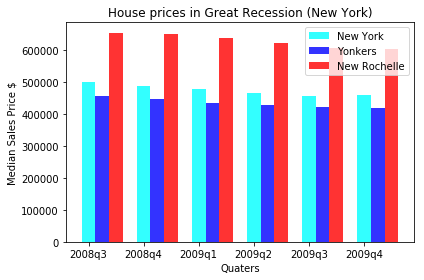

In [31]:
plt.show()

In [32]:
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8
x=np.arange(6)
objects=list(Us_reces.index)
y1=Us_reces['Los Angeles']
y2=Us_reces['Berkeley']
y2=y2.mean(axis=1)
y3=Us_reces['Irvine']
f1=plt.bar(x,y1,bar_width,alpha=opacity,color='tab:blue',label='Los Angeles')
f2=plt.bar(x + bar_width,y2,bar_width,alpha=opacity,color='tab:orange',label='Berkeley')
f3=plt.bar(x + bar_width*2,y3,bar_width,alpha=opacity,color='tab:red',label='Irvine')
plt.xlabel('Quaters')
plt.ylabel('Median Sales Price $')
plt.title('House prices in Great Recession (California)')
plt.xticks(x,objects)
plt.legend()
plt.figure(figsize=(50,35))

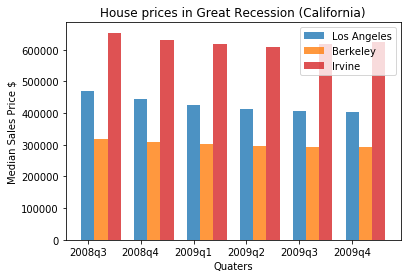

In [33]:
plt.show()

In [34]:
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8
x=np.arange(6)
objects=list(Us_reces.index)
y1=Us_reces['Boston']
y2=Us_reces['Fitchburg']
y3=Us_reces['Cambridge']
y1=y1.mean(axis=1)
y2=y2.mean(axis=1)
y3=y3.mean(axis=1)

In [35]:
f1=plt.bar(x,y1,bar_width,alpha=opacity,color='brown',label='Boston')
f2=plt.bar(x + bar_width,y2,bar_width,alpha=opacity,color='peachpuff',label='Fitchburg')
f3=plt.bar(x + bar_width*2,y3,bar_width,alpha=opacity,color='crimson',label='Cambridge')
plt.xlabel('Quaters')
plt.ylabel('Median Sales Price $')
plt.title('House prices in Great Recession (Massachusetts)')
plt.xticks(x,objects)
plt.legend()
plt.tight_layout()
plt.figure(figsize=(50,35))

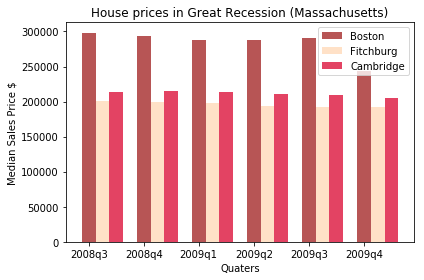

In [36]:
plt.show()

In [37]:
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8
x=np.arange(6)
objects=list(Us_reces.index)
y1=Us_reces['Seattle']
y2=Us_reces['Bellingham']
y3=Us_reces['Cheney']
y3=y3.mean(axis=1)
y3

2008q3    146316.666667
2008q4    147600.000000
2009q1    149750.000000
2009q2    150900.000000
2009q3    150916.666667
2009q4    149850.000000
dtype: float64

In [38]:
f1=plt.bar(x,y1,bar_width,alpha=opacity,color='lime',label='Seattle')
f2=plt.bar(x + bar_width,y2,bar_width,alpha=opacity,color='navy',label='Bellingham')
f3=plt.bar(x + bar_width*2,y3,bar_width,alpha=opacity,color='yellow',label='Cheney')
plt.xlabel('Quaters')
plt.ylabel('Median Sales Price $')
plt.title('House prices in Great Recession (Washington)')
plt.xticks(x,objects)
plt.legend()
#plt.tight_layout()
plt.figure(figsize=(50,35))

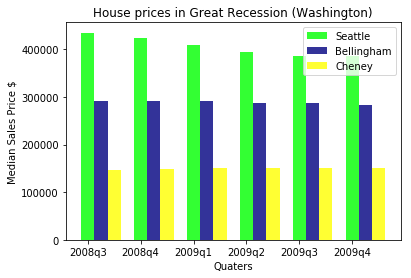

In [39]:
plt.show()

In [40]:
Res1= final1[['2008q3','2008q4','2009q1','2009q2','2009q3','2009q4']]

In [42]:
res_illinois=Res1.loc['Illinois']
res_michigan=Res1.loc['Michigan']
res_texas=Res1.loc['Texas']
res_florida=Res1.loc['Florida']

In [53]:
viz1=res_illinois.mean()
viz2=res_michigan.mean()
viz3=res_texas.mean()
viz4=res_florida.mean()

In [44]:
x1=np.arange(6)

In [68]:
plt.plot(x1,viz1,'c^',linestyle='-.', linewidth=2, markersize=12)

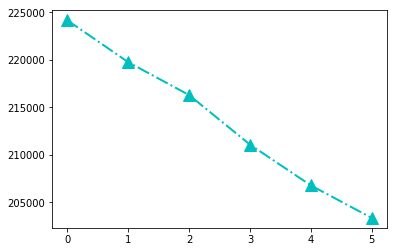

In [69]:
plt.show()

In [70]:
plt.plot(x1,viz2,'bo',linestyle='--', linewidth=2, markersize=12)

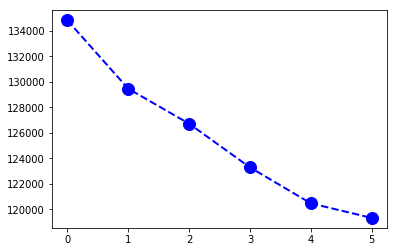

In [71]:
plt.show()

In [72]:
plt.plot(x1,viz3,'r^',linestyle='-', linewidth=2, markersize=12)

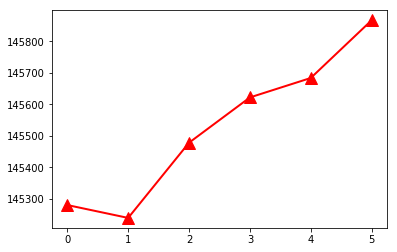

In [73]:
plt.show()

In [74]:
plt.plot(x1,viz4,'go',linestyle=':', linewidth=2, markersize=12)

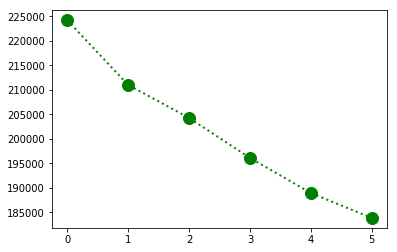

In [75]:
plt.show()